# Recommendation

This study aims to develop a recommendation system to identify the types of videos and platforms that influence behavioral outcomes. The primary focus is to analyze addiction levels, productivity loss, and user satisfaction, exploring how these metrics vary by gender, age, and profession.   
Identify Influential Platforms and Video Types:
* Determine which types of videos and platforms have the most significant impact on negative behavioral outcomes.   
Analyze Behavioral Outcomes:   
* Group and compare behavioral metrics (e.g., addiction levels, productivity loss, satisfaction) by gender, age, and profession.     
Develop a Recommender System:   
* Implement a system that leverages user data to predict and mitigate adverse behavioral outcomes.

Latent Feature Learning Techniques:    
Use matrix factorization methods (e.g., Singular Value Decomposition, Alternating Least Squares) to uncover hidden patterns in user behavior data. These patterns can reveal latent features influencing addiction levels and productivity loss.     

User Similarity Metrics:     
Apply metrics such as cosine similarity to group users with similar behavioral patterns.
Focus on profiling high-risk users (e.g., those exhibiting high addiction levels) to develop targeted interventions or recommendations.     

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage, fcluster

Load the dataset

In [2]:
# Load the dataset
data = pd.read_csv("Time-Wasters on Social Media.csv")

### Descriptive Analysis

Conducted grouping and aggregation analyses to explore how average behavioral outcomes vary across platforms and video categories. Identified trends highlighting the platforms or video types associated with higher addiction levels, decreased productivity, or increased user satisfaction.

In [3]:
# Group by Platform to find average behavioral outcomes
platform_behavior = data.groupby('Platform').agg({
    'Addiction Level': 'mean',
    'ProductivityLoss': 'mean',
    'Satisfaction': 'mean'
}).reset_index()

# Display the aggregated metrics for each platform
print(platform_behavior)

print("\n")
# Group by Video Category to find average behavioral outcomes
video_behavior = data.groupby('Video Category').agg({
    'Addiction Level': 'mean',
    'ProductivityLoss': 'mean',
    'Satisfaction': 'mean'
}).reset_index()

# Display the aggregated metrics for each video category
print(video_behavior)

    Platform  Addiction Level  ProductivityLoss  Satisfaction
0   Facebook         2.977376          5.067873      4.932127
1  Instagram         2.960938          5.078125      4.921875
2     TikTok         2.912088          5.135531      4.864469
3    YouTube         2.780000          5.256000      4.744000


  Video Category  Addiction Level  ProductivityLoss  Satisfaction
0           ASMR         2.683544          5.341772      4.658228
1         Comedy         2.742857          5.257143      4.742857
2  Entertainment         3.137255          4.862745      5.137255
3         Gaming         3.075630          5.000000      5.000000
4    Jokes/Memes         2.715084          5.368715      4.631285
5     Life Hacks         2.987654          5.049383      4.950617
6         Pranks         2.645455          5.409091      4.590909
7         Trends         3.260000          4.760000      5.240000
8          Vlogs         2.850877          5.166667      4.833333


Visualize Platform Impact on Behavioral Metrics

C:\Users\vital\AppData\Local\Temp\ipykernel_16128\963911880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_behavior, x='Platform', y='Addiction Level', palette='Set2')


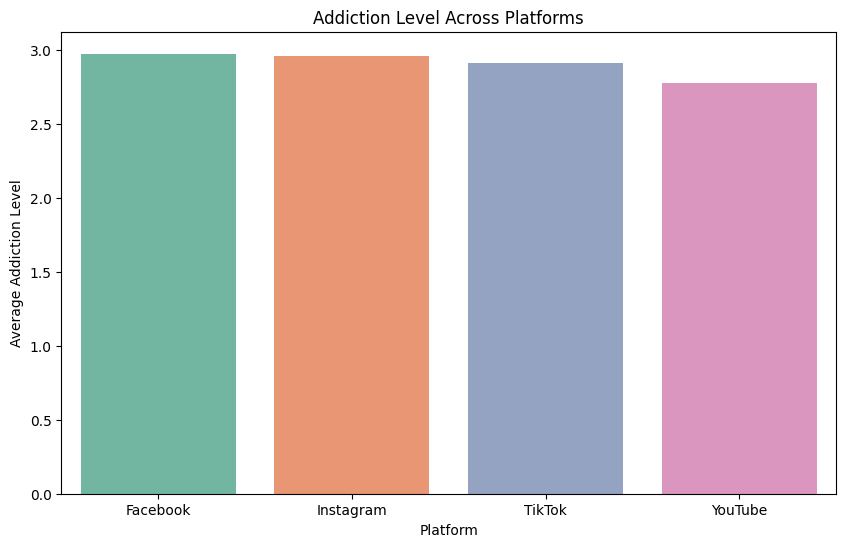

In [4]:
# Visualize platform impact
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_behavior, x='Platform', y='Addiction Level', palette='Set2')
plt.title('Addiction Level Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Addiction Level')
plt.show()


Visualize Productivity Loss and Satisfaction for platforms

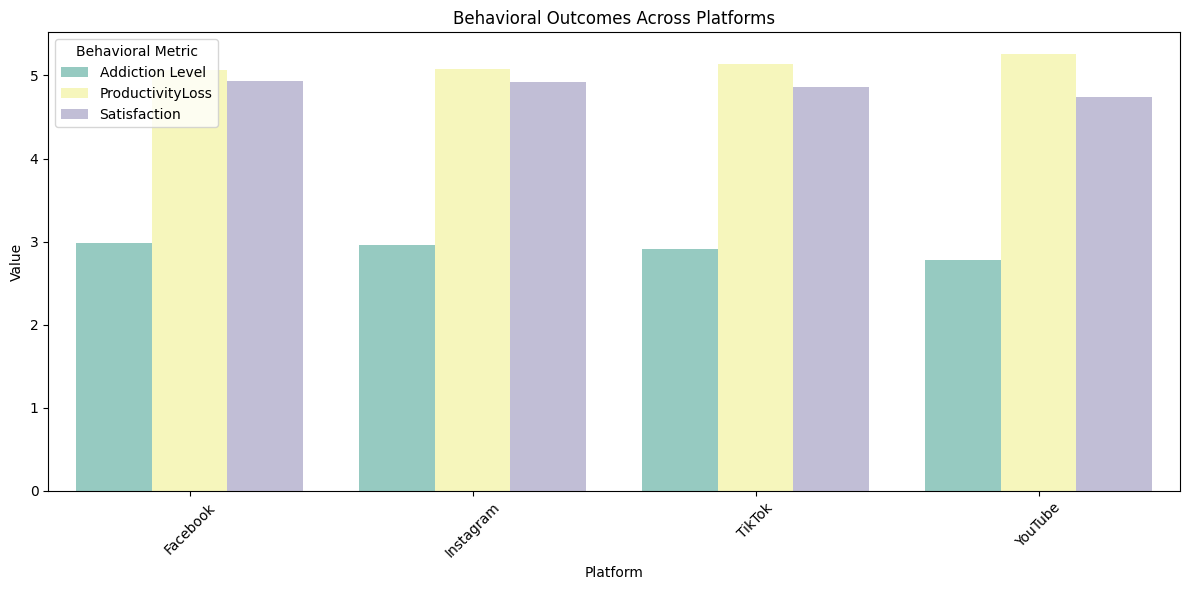

In [5]:
# Visualize Productivity Loss and Satisfaction for platforms
platform_behavior_melted = pd.melt(platform_behavior, id_vars='Platform', 
                                   value_vars=['Addiction Level', 'ProductivityLoss', 'Satisfaction'], 
                                   var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=platform_behavior_melted, x='Platform', y='Value', hue='Metric', palette='Set3')
plt.title('Behavioral Outcomes Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Behavioral Metric')
plt.tight_layout()
plt.show()

Visualize Video Category Impact on Behavioral Metrics

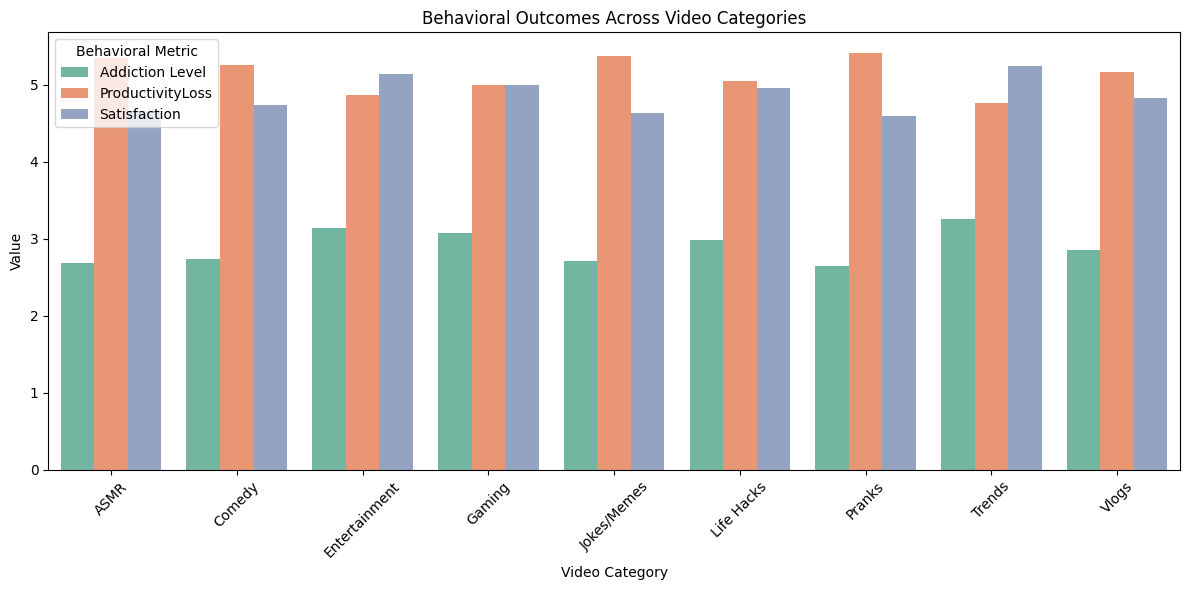

In [6]:
# Visualize video category impact
video_behavior_melted = pd.melt(video_behavior, id_vars='Video Category', 
                                value_vars=['Addiction Level', 'ProductivityLoss', 'Satisfaction'], 
                                var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=video_behavior_melted, x='Video Category', y='Value', hue='Metric', palette='Set2')
plt.title('Behavioral Outcomes Across Video Categories')
plt.xlabel('Video Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Behavioral Metric')
plt.tight_layout()
plt.show()

Identify the video categories and platforms that contribute most significantly to negative behavioral outcomes and positive behavioral outcomes.

Identify the specific platforms and video categories that contribute most significantly to negative behavioral outcomes (e.g., high addiction levels and productivity loss) as well as those that have a positive behavioral impact (e.g., high satisfaction, low addiction, and low productivity loss)

In [7]:
# Identify top contributors to behavioral metrics
top_addiction_platforms = platform_behavior.sort_values(by='Addiction Level', ascending=False)
print("Platforms with Highest Addiction Levels:")
print(top_addiction_platforms)


top_loss_categories = video_behavior.sort_values(by='ProductivityLoss', ascending=False)
print("\nVideo Categories with Highest Productivity Loss:")
print(top_loss_categories)


positive_impact_videos = video_behavior.sort_values(
    by=['Satisfaction', 'Addiction Level', 'ProductivityLoss'], ascending=[False, True, True]
)
print("\nVideo Categories with Positive Behavioral Impacts:")
print(positive_impact_videos)

Platforms with Highest Addiction Levels:
    Platform  Addiction Level  ProductivityLoss  Satisfaction
0   Facebook         2.977376          5.067873      4.932127
1  Instagram         2.960938          5.078125      4.921875
2     TikTok         2.912088          5.135531      4.864469
3    YouTube         2.780000          5.256000      4.744000

Video Categories with Highest Productivity Loss:
  Video Category  Addiction Level  ProductivityLoss  Satisfaction
6         Pranks         2.645455          5.409091      4.590909
4    Jokes/Memes         2.715084          5.368715      4.631285
0           ASMR         2.683544          5.341772      4.658228
1         Comedy         2.742857          5.257143      4.742857
8          Vlogs         2.850877          5.166667      4.833333
5     Life Hacks         2.987654          5.049383      4.950617
3         Gaming         3.075630          5.000000      5.000000
2  Entertainment         3.137255          4.862745      5.137255
7    

This outcome identifies the platforms (e.g., Facebook and Instagram) and video categories (e.g., Pranks and Jokes/Memes) most associated with high addiction levels and productivity loss, highlighting areas of concern for behavioral interventions. It also reveals video categories like Trends and Entertainment that promote higher user satisfaction, offering opportunities to enhance positive user experiences.

Analyze Behavioral Outcomes:

Group and compare behavioral metrics (addiction levels, productivity loss, satisfaction) by gender, age, and profession.
The goal is to uncover demographic patterns in behavioral metrics to better understand which groups are more impacted by negative outcomes.

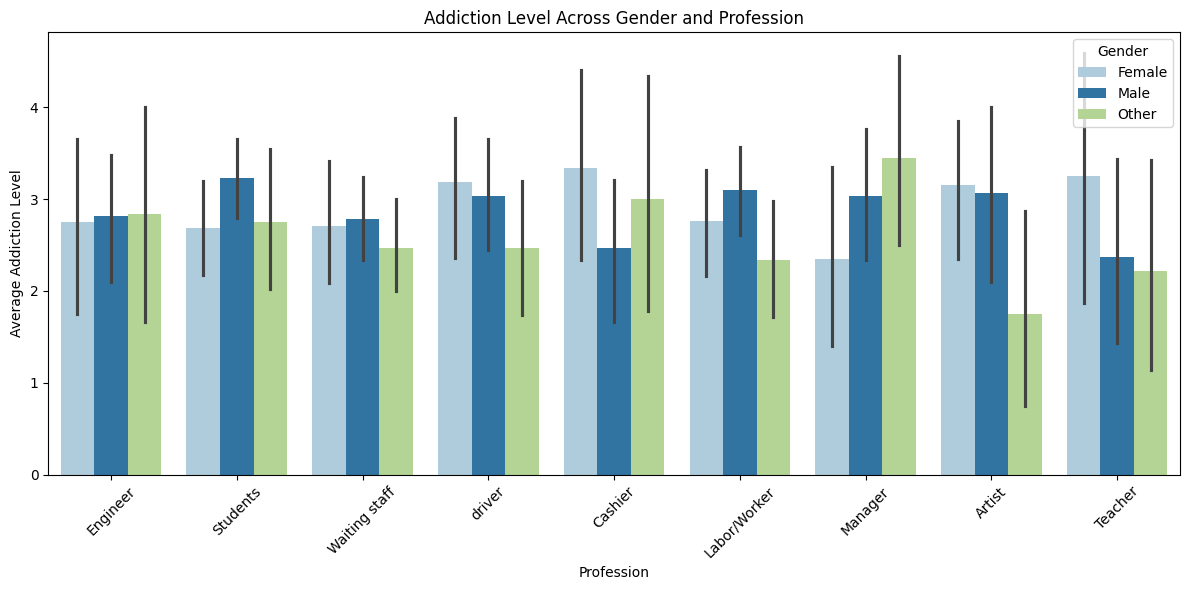

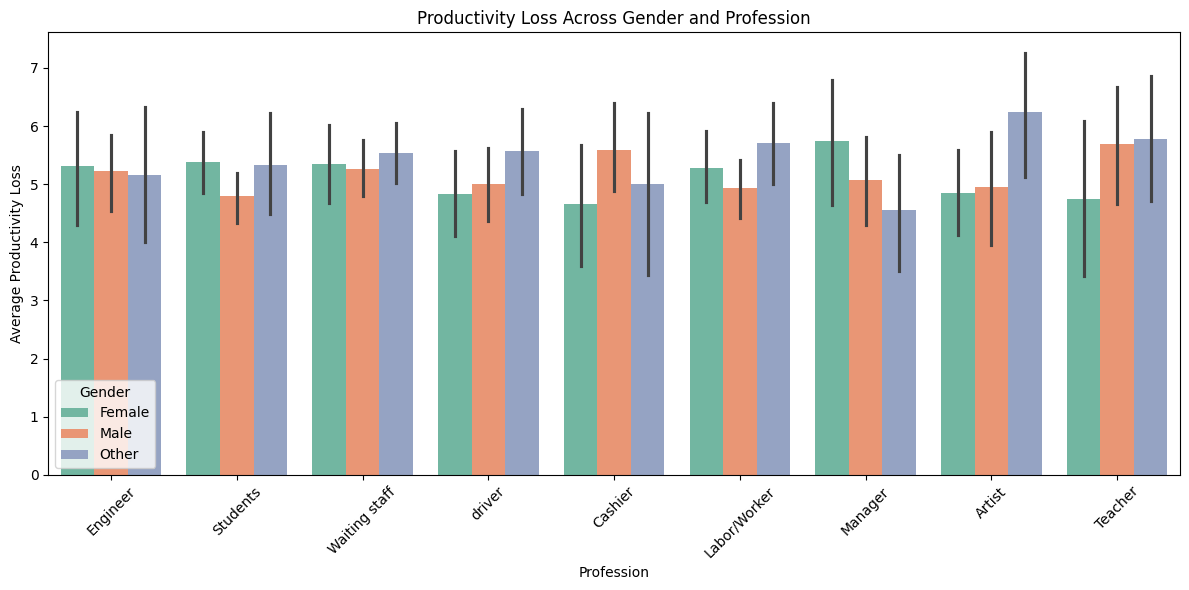

In [8]:
# Group by Gender and Education, calculate average behavioral outcomes
gender_education_behavior = data.groupby(['Gender', 'Age','Profession']).agg({
    'Addiction Level': 'mean',
    'ProductivityLoss': 'mean',
}).reset_index()

# Visualize Addiction Level across Gender and Profession
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_education_behavior, x='Profession', y='Addiction Level', hue='Gender', palette='Paired')
plt.title('Addiction Level Across Gender and Profession')
plt.xlabel('Profession')
plt.ylabel('Average Addiction Level')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Productivity Loss across Gender and Education
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_education_behavior, x='Profession', y='ProductivityLoss', hue='Gender', palette='Set2')
plt.title('Productivity Loss Across Gender and Profession')
plt.xlabel('Profession')
plt.ylabel('Average Productivity Loss')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Certain professions (e.g., students, labor workers, and artists) appear to have higher average addiction levels compared to others like engineers or teachers.     
Differences between genders within the same profession suggest that males, females, or others may experience addiction levels differently depending on their professional roles.      
Professions like waiting staff, students, and labor workers show higher average productivity loss compared to others.     
The variation in productivity loss by gender within each profession indicates how behavioral outcomes are influenced by both profession and gender, with some gender groups being more affected in specific roles.     

# Latent Feature Learning with NMF

Technique  Non-Negative Matrix Factorization (NMF) to analyze the relationship between users and platforms based on addiction levels. By breaking down the data into latent features, we aim to uncover hidden patterns that aren't directly observable, such as which platforms contribute most to addiction for specific types of users. These insights will help us better understand user behavior and create targeted recommendations to reduce negative impacts.

In [9]:
# Prepare user-platform matrix for addiction level
user_platform_matrix = data.pivot_table(
    index='UserID', columns='Platform', values='Addiction Level', fill_value=0
)

# Normalize the data for NMF
scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(user_platform_matrix)

# Apply NMF
nmf = NMF(n_components=5, random_state=42)
user_features = nmf.fit_transform(normalized_matrix)
platform_features = nmf.components_

# Reconstruct the matrix to evaluate hidden patterns
reconstructed_matrix = np.dot(user_features, platform_features)

# Convert reconstructed matrix back to DataFrame
reconstructed_df = pd.DataFrame(
    reconstructed_matrix, index=user_platform_matrix.index, columns=user_platform_matrix.columns
)

Analyzes which platforms contribute the most to each latent feature identified through NMF. Each latent feature represents a hidden pattern or behavior, and the contributions show how strongly each platform aligns with these underlying patterns. 
We can analyze and rank platforms based on their contributions to each latent feature:     

In [10]:
# Analyze the top contributing platforms for each latent feature
latent_features_df = pd.DataFrame(platform_features.T, 
                                  index=user_platform_matrix.columns, 
                                  columns=[f"Latent Feature {i+1}" for i in range(platform_features.shape[0])])

print("Top contributing platforms for each latent feature:")
for i in range(platform_features.shape[0]):
    print(f"Latent Feature {i+1}:")
    top_platforms = latent_features_df.sort_values(by=f"Latent Feature {i+1}", ascending=False).head(5)
    print(top_platforms)
    print("\n")

Top contributing platforms for each latent feature:
Latent Feature 1:
           Latent Feature 1  Latent Feature 2  Latent Feature 3  \
Platform                                                          
YouTube            0.251477          0.000000          0.000000   
Facebook           0.000000          0.000000          0.000000   
Instagram          0.000000          0.000000          0.149264   
TikTok             0.000000          0.394072          0.000000   

           Latent Feature 4  Latent Feature 5  
Platform                                       
YouTube            0.000000          0.000000  
Facebook           0.000000          1.038182  
Instagram          0.607179          0.000000  
TikTok             0.000000          0.000000  


Latent Feature 2:
           Latent Feature 1  Latent Feature 2  Latent Feature 3  \
Platform                                                          
TikTok             0.000000          0.394072          0.000000   
Facebook          

Platforms such as YouTube, Instagram, and TikTok contribute significantly to specific latent features, revealing their unique influence on user behaviors. For example, Instagram aligns strongly with Latent Features 3 and 4, likely reflecting its role in visual and social engagement, while Facebook has a dominant influence on Latent Feature 5, potentially tied to its networking and content-sharing dynamics. These insights provide valuable guidance for developing targeted strategies to address platform-specific behavioral patterns.

Visualize platform contributions to latent features

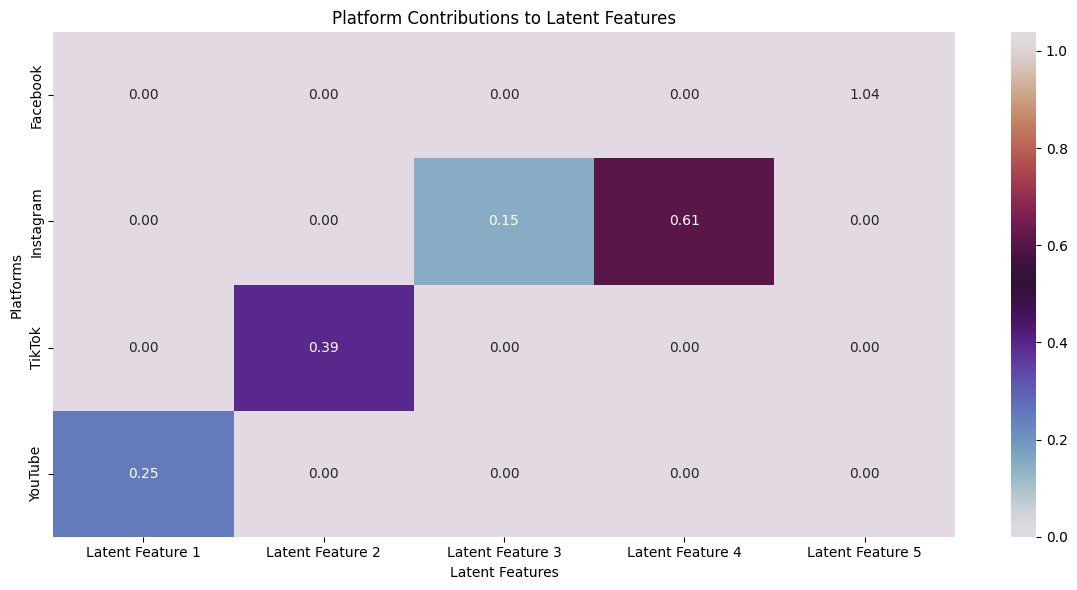

In [11]:
# Visualize platform contributions to latent features
plt.figure(figsize=(12, 6))
sns.heatmap(latent_features_df, annot=True, cmap='twilight', fmt='.2f')
plt.title('Platform Contributions to Latent Features')
plt.xlabel('Latent Features')
plt.ylabel('Platforms')
plt.tight_layout()
plt.show()

Facebook exhibits the highest contribution to Latent Feature 5 (value: 1.04), indicating its strong association with a distinct behavioral pattern, potentially related to long-form content or social networking.
Instagram plays a dominant role in Latent Feature 4 (value: 0.61), likely reflecting its visual engagement and social interaction dynamics.
TikTok is strongly associated with Latent Feature 2 (value: 0.39), possibly capturing its unique engagement driven by short-form, highly addictive content.
YouTube leads in Latent Feature 1 (value: 0.25), highlighting its influence on a specific pattern of user behavior.

# Clustering Users Based on Latent Features

Identify Clusters of Users with Similar Patterns
Using k-means clustering, we group users into clusters based on their alignment with latent features. The goal is to uncover patterns in user behavior by grouping individuals with similar preferences or tendencies. These clusters help to identify distinct user groups that share common behavioral traits, enabling the development of targeted interventions or strategies.

In [13]:
#Clustering Users Based on Latent Features
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
user_clusters = kmeans.fit_predict(user_features)

# Add cluster labels to user data
user_cluster_df = pd.DataFrame(user_features, 
                               index=user_platform_matrix.index, 
                               columns=[f"Latent Feature {i+1}" for i in range(user_features.shape[1])])
user_cluster_df['Cluster'] = user_clusters

print("User Clusters and Sizes:")
print(user_cluster_df['Cluster'].value_counts())

User Clusters and Sizes:
Cluster
2    773
1    131
0     96
Name: count, dtype: int64


Visualize user clusters in latent feature space

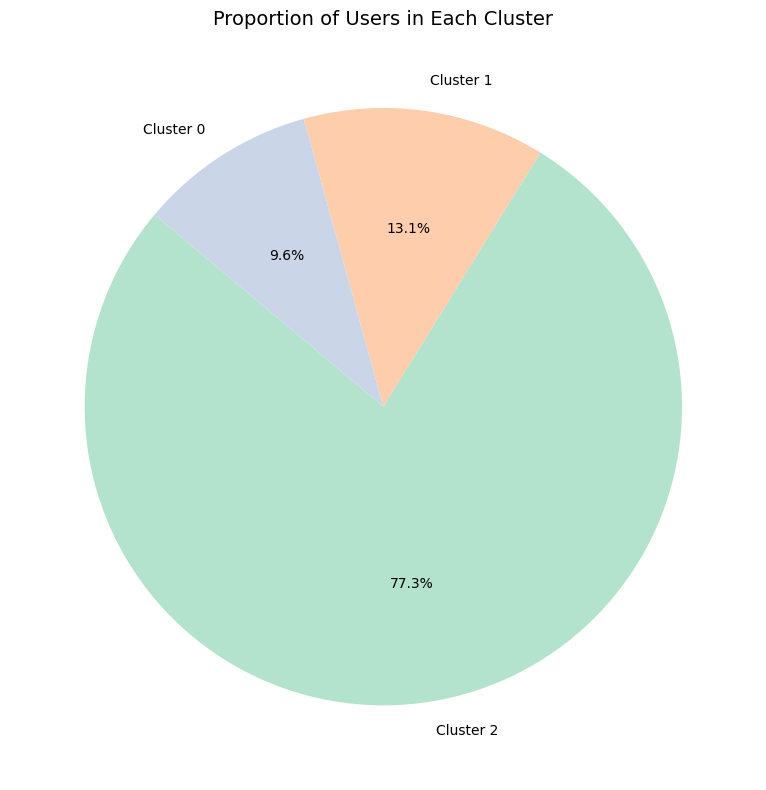

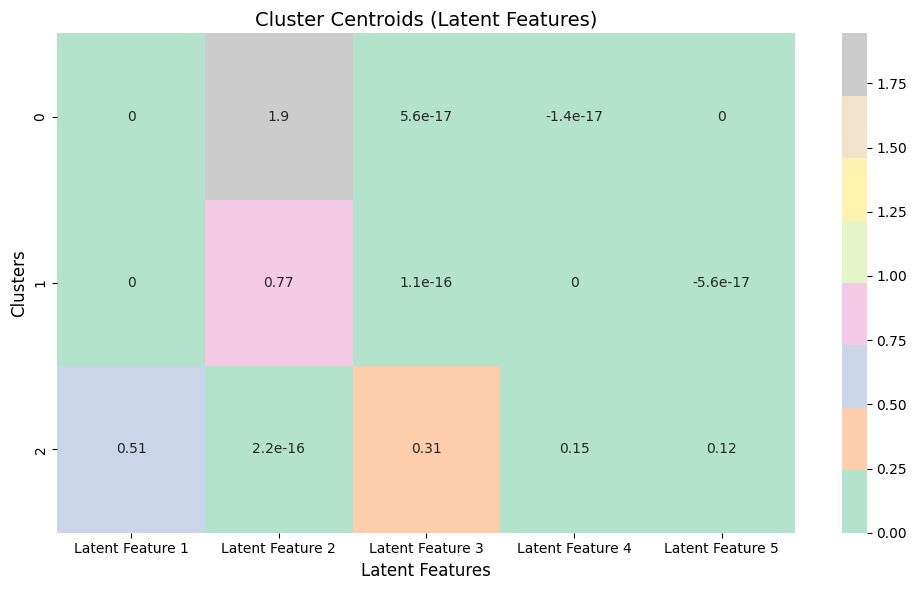

In [14]:
# Calculate the cluster sizes (number of users in each cluster)
cluster_sizes = user_cluster_df['Cluster'].value_counts()


# Pie Chart for Cluster Proportions
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes.values, labels=[f"Cluster {key}" for key in cluster_sizes.index], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel2', len(cluster_sizes)))
plt.title('Proportion of Users in Each Cluster', fontsize=14)
plt.tight_layout()
plt.show()


# Get the centroids of the clusters (each is a vector in the latent feature space)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f"Latent Feature {i+1}" for i in range(user_features.shape[1])])

# Plot Heatmap of Centroids
plt.figure(figsize=(10, 6))
sns.heatmap(centroids, annot=True, cmap="Pastel2", cbar=True)
plt.title('Cluster Centroids (Latent Features)', fontsize=14)
plt.xlabel('Latent Features', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.tight_layout()
plt.show()



This visualization highlights the behavioral diversity among user groups, allowing for tailored interventions or recommendations for each cluster.     
Cluster 2 (Blue): Users in this cluster are aligned closer to Latent Feature 1 (horizontal axis), suggesting they have behaviors tied to patterns driven by platforms like YouTube. They may represent users who engage more passively in long-form content.     
Cluster 0 (Green): These users align more strongly with Latent Feature 2 (vertical axis). This suggests they are highly active on platforms like TikTok, where behaviors are more driven by short-form and engaging content.     
Cluster 1 (Orange): This cluster is smaller and falls in between, representing users with mixed behaviors. They might not have a dominant platform preference but exhibit unique usage traits.     

# Cosine Similarity Analysis

This identifies behavioral similarities between users by calculating cosine similarity scores in the latent feature space. The goal is to find users with similar patterns of engagement and to focus specifically on high-addiction users to understand their shared characteristics.

Top Similar Users: Each user is matched with their top 5 most similar users, highlighting shared tendencies and potential clustering in user behaviors.
High-Addiction Users: By isolating users with the highest addiction levels, the analysis provides a targeted view of their behavioral alignment, offering insights for personalized interventions or strategies to reduce harmful engagement patterns.

In [15]:
# Import cosine_similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_features)
user_similarity_df = pd.DataFrame(user_similarity, 
                                   index=user_platform_matrix.index, 
                                   columns=user_platform_matrix.index)

# Display top 5 similar users for each user
print("Top 5 Similar Users for Each User:")
for user in user_similarity_df.index:
    similar_users = user_similarity_df.loc[user].sort_values(ascending=False).head(6)  # Top 5 + self
    print(f"User {user}: {list(similar_users.index[1:])}")  # Exclude self

# High-Addiction User Similarity
high_addiction_threshold = np.percentile(data['Addiction Level'], 80)
high_addiction_users = data[data['Addiction Level'] >= high_addiction_threshold]['UserID'].unique()

# Subset similarity matrix for high-addiction users
high_addiction_similarity = user_similarity_df.loc[high_addiction_users, high_addiction_users]

Top 5 Similar Users for Each User:
User 1: [123, 694, 760, 270, 895]
User 2: [543, 695, 546, 766, 367]
User 3: [892, 902, 140, 266, 900]
User 4: [762, 309, 307, 772, 300]
User 5: [672, 659, 660, 661, 662]
User 6: [133, 389, 820, 493, 878]
User 7: [672, 659, 660, 661, 662]
User 8: [69, 977, 33, 872, 185]
User 9: [383, 664, 210, 810, 352]
User 10: [762, 309, 307, 772, 300]
User 11: [176, 271, 167, 699, 372]
User 12: [319, 332, 331, 329, 755]
User 13: [367, 173, 337, 546, 782]
User 14: [892, 902, 140, 266, 900]
User 15: [762, 309, 307, 772, 300]
User 16: [762, 309, 307, 772, 300]
User 17: [892, 902, 140, 266, 900]
User 18: [892, 902, 140, 266, 900]
User 19: [892, 902, 140, 266, 900]
User 20: [672, 659, 660, 661, 662]
User 21: [762, 309, 307, 772, 300]
User 22: [892, 902, 140, 266, 900]
User 23: [833, 487, 624, 278, 377]
User 24: [892, 902, 140, 266, 900]
User 25: [319, 332, 331, 329, 755]
User 26: [319, 332, 331, 329, 755]
User 27: [762, 309, 307, 772, 300]
User 28: [590, 64, 134, 315, 14

Visualize similarity among high-addiction users

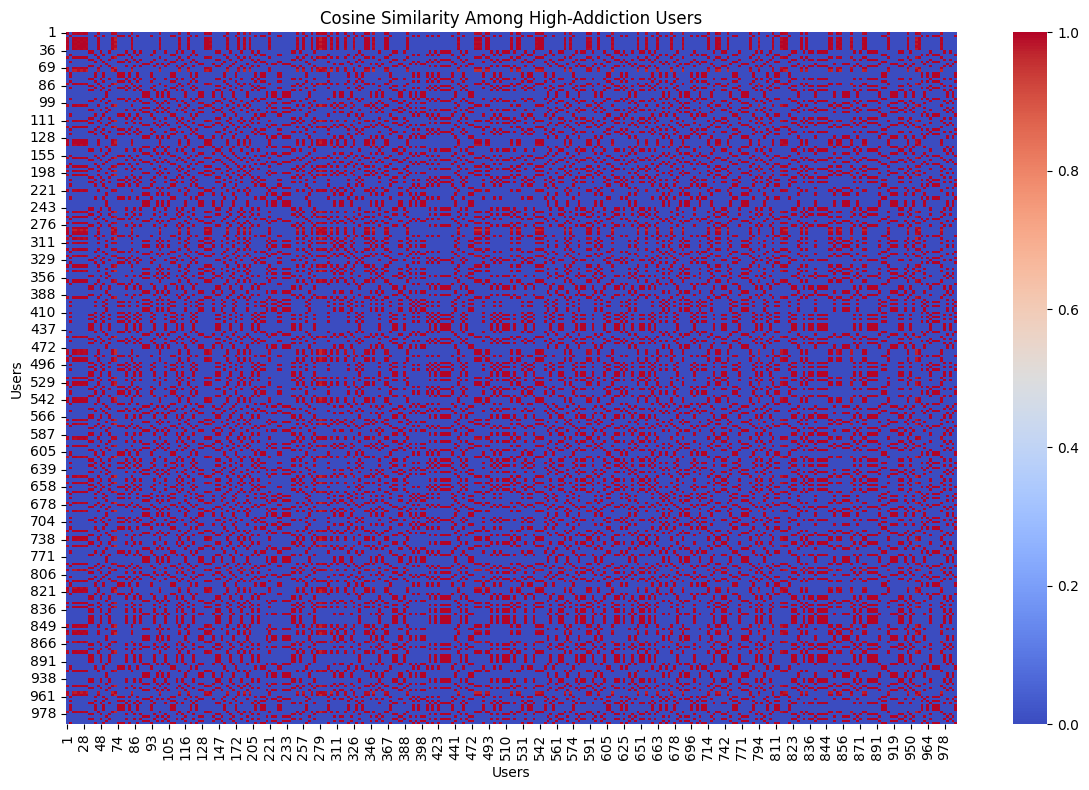

In [16]:
# Visualize similarity among high-addiction users
plt.figure(figsize=(12, 8))
sns.heatmap(high_addiction_similarity, cmap='coolwarm', annot=False)
plt.title('Cosine Similarity Among High-Addiction Users')
plt.xlabel('Users')
plt.ylabel('Users')
plt.tight_layout()
plt.show()


This heatmap visualizes the similarity between high-addiction users, where red indicates strong behavioral similarity, and blue indicates dissimilarity. Red clusters highlight groups of users who share common addiction patterns, likely driven by the same platforms or content types. For example, users in these clusters might be addicted to specific platforms like TikTok or Instagram. Blue areas reveal that some users have distinct behaviors, suggesting addiction triggers vary and require personalized interventions. 

Hierarchical Clustering for High-Addiction Users

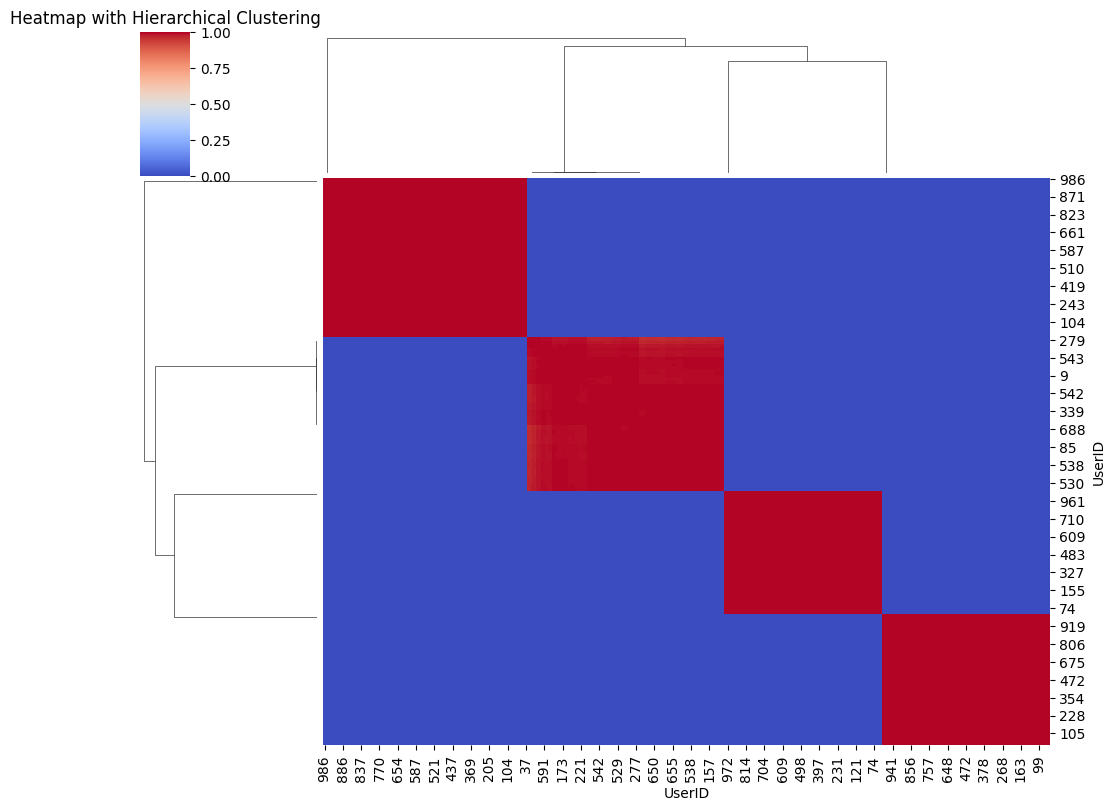

In [17]:
# Hierarchical Clustering for High-Addiction Users
linkage_matrix = linkage(high_addiction_similarity, method='ward')

# Generate a heatmap
sns.clustermap(high_addiction_similarity, row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               figsize=(10, 8), cmap='coolwarm')
plt.title('Heatmap with Hierarchical Clustering')
plt.show()


This heatmap visualizes the similarity between high-addiction users while grouping them into hierarchical clusters. The dendrograms highlight distinct user groups, with red blocks representing groups of users with highly similar behavioral patterns. For example:   

A large cluster of users (top-left red block) exhibits strong similarity, likely driven by common behavioral triggers.    
Smaller red clusters suggest niche behaviors, while blue areas highlight diverse patterns requiring more individualized approaches.    
Conclusion
This analysis identifies both large and small groups of high-addiction users with shared behaviors, enabling targeted group-specific interventions. Additionally, the diversity in patterns (blue areas) underscores the need for personalized solutions for users outside major clusters.    

Performs a cluster-wise behavioral analysis on high-addiction users. Using hierarchical clustering, the high-addiction users are grouped into three clusters. The code then calculates the average Addiction Level, Productivity Loss, and Satisfaction for each cluster and visualizes the results.


Cluster-Wise Behavioral Analysis:
   Cluster  Addiction Level  ProductivityLoss  Satisfaction
0        1         5.471910          2.528090      7.471910
1        2         5.441860          2.558140      7.441860
2        3         5.450704          2.549296      7.450704


C:\Users\vital\AppData\Local\Temp\ipykernel_16128\638150849.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_analysis, x='Cluster', y='Addiction Level', palette='viridis')


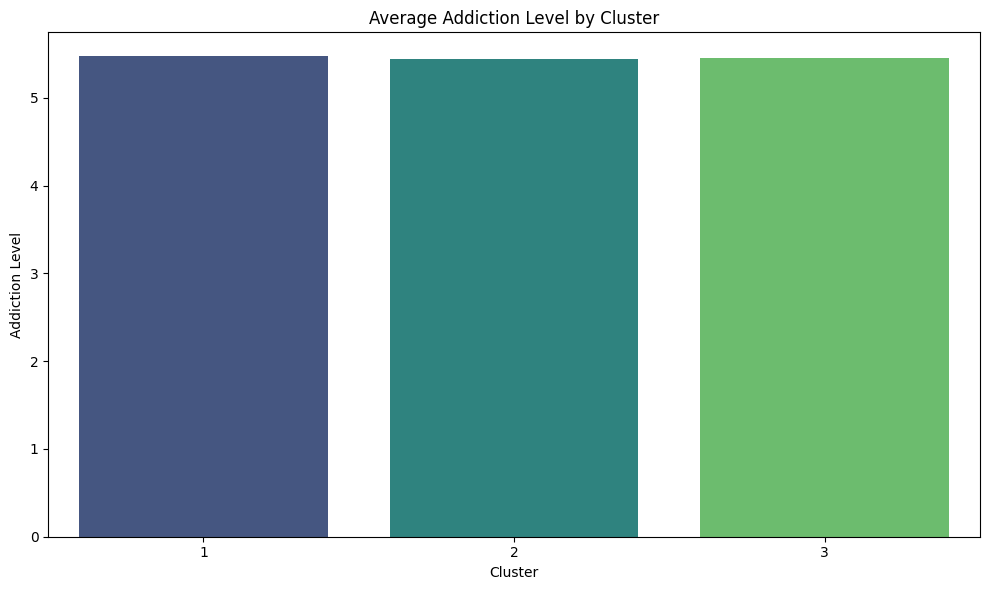

In [18]:
# Assign cluster labels
cluster_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
high_addiction_profiles = pd.DataFrame({
    'UserID': high_addiction_similarity.index,
    'Cluster': cluster_labels
})

# Merge cluster labels with original data
high_addiction_data = data[data['UserID'].isin(high_addiction_profiles['UserID'])]
high_addiction_data = high_addiction_data.merge(high_addiction_profiles, on='UserID')

# Analyze clusters
cluster_analysis = high_addiction_data.groupby('Cluster').agg({
    'Addiction Level': 'mean',
    'ProductivityLoss': 'mean',
    'Satisfaction': 'mean'
}).reset_index()

print("\nCluster-Wise Behavioral Analysis:")
print(cluster_analysis)

# Visualize cluster patterns
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_analysis, x='Cluster', y='Addiction Level', palette='viridis')
plt.title('Average Addiction Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Addiction Level')
plt.tight_layout()
plt.show()

This analysis divides high-addiction users into three clusters based on their behavioral patterns. The results highlight:

Cluster 0: High addiction and satisfaction but minimal productivity loss.
Cluster 1: Similar to Cluster 0, with slightly lower satisfaction.
Cluster 2: High addiction and satisfaction but significant productivity loss, indicating a group more affected by the negative outcomes of their behaviors.

Cluster 0 and Cluster 1: Users in these clusters have high satisfaction levels despite their high addiction. They might represent users who engage with platforms as part of their lifestyle but do not see significant negative impacts.
Cluster 2: This cluster stands out for its higher productivity loss, suggesting that this group is the most affected by the addictive behaviors, potentially leading to more negative outcomes.

Evaluate Recommendations     
To validate the effectiveness of the recommendations derived from latent features, compare predicted user behaviors with observed metrics (e.g., addiction levels, satisfaction, and productivity loss):     

In [19]:
# Compare reconstructed values with observed values
observed_addiction = user_platform_matrix
predicted_addiction = pd.DataFrame(reconstructed_matrix, 
                                   index=user_platform_matrix.index, 
                                   columns=user_platform_matrix.columns)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(observed_addiction.values.flatten(), predicted_addiction.values.flatten())
print(f"Mean Absolute Error of Addiction Level Predictions: {mae:.2f}")

# Identify users with highest prediction discrepancies
discrepancies = observed_addiction - predicted_addiction
high_discrepancy_users = discrepancies.abs().mean(axis=1).sort_values(ascending=False).head(5)
print("\nUsers with Highest Prediction Discrepancies:")
print(high_discrepancy_users)

Mean Absolute Error of Addiction Level Predictions: 0.62

Users with Highest Prediction Discrepancies:
UserID
639    1.5
727    1.5
656    1.5
655    1.5
654    1.5
dtype: float64


Evaluation of Addiction Level Predictions
To validate the effectiveness of the latent feature model, we compared predicted addiction levels with observed values and calculated a Mean Absolute Error (MAE) of 0.62, indicating reasonable model accuracy. However, several users (e.g., User 639, User 727) exhibit high prediction discrepancies, with errors of up to 1.5. These outliers may represent unique behavioral patterns not well captured by the model.     

The MAE is 0.62, which indicates the average prediction error for addiction levels. A lower MAE suggests the model is relatively accurate, though there is still room for improvement.

Recommendations Based on Analysis

In [20]:
#Recommendations
def recommend_videos(platform_behavior, video_behavior, target_metric='Addiction Level', top_n=5, minimize=True):
    # Sort platforms by the target metric
    sorted_platforms = platform_behavior.sort_values(by=target_metric, ascending=minimize).head(top_n)
    # Sort video categories by the target metric
    sorted_videos = video_behavior.sort_values(by=target_metric, ascending=minimize).head(top_n)
    
    print(f"Top {top_n} Platforms to {'Minimize' if minimize else 'Maximize'} {target_metric}:")
    print(sorted_platforms[['Platform', target_metric]])
    print("\n")
    print(f"Top {top_n} Video Categories to {'Minimize' if minimize else 'Maximize'} {target_metric}:")
    print(sorted_videos[['Video Category', target_metric]])

# Example usage
recommend_videos(platform_behavior, video_behavior, target_metric='Addiction Level', minimize=True)
recommend_videos(platform_behavior, video_behavior, target_metric='Satisfaction', minimize=False)

Top 5 Platforms to Minimize Addiction Level:
    Platform  Addiction Level
3    YouTube         2.780000
2     TikTok         2.912088
1  Instagram         2.960938
0   Facebook         2.977376


Top 5 Video Categories to Minimize Addiction Level:
  Video Category  Addiction Level
6         Pranks         2.645455
0           ASMR         2.683544
4    Jokes/Memes         2.715084
1         Comedy         2.742857
8          Vlogs         2.850877
Top 5 Platforms to Maximize Satisfaction:
    Platform  Satisfaction
0   Facebook      4.932127
1  Instagram      4.921875
2     TikTok      4.864469
3    YouTube      4.744000


Top 5 Video Categories to Maximize Satisfaction:
  Video Category  Satisfaction
7         Trends      5.240000
2  Entertainment      5.137255
3         Gaming      5.000000
5     Life Hacks      4.950617
8          Vlogs      4.833333


C:\Users\vital\AppData\Local\Temp\ipykernel_16128\1123312463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_behavior.sort_values(by='Addiction Level').head(5),
C:\Users\vital\AppData\Local\Temp\ipykernel_16128\1123312463.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_behavior.sort_values(by='Addiction Level').head(5),


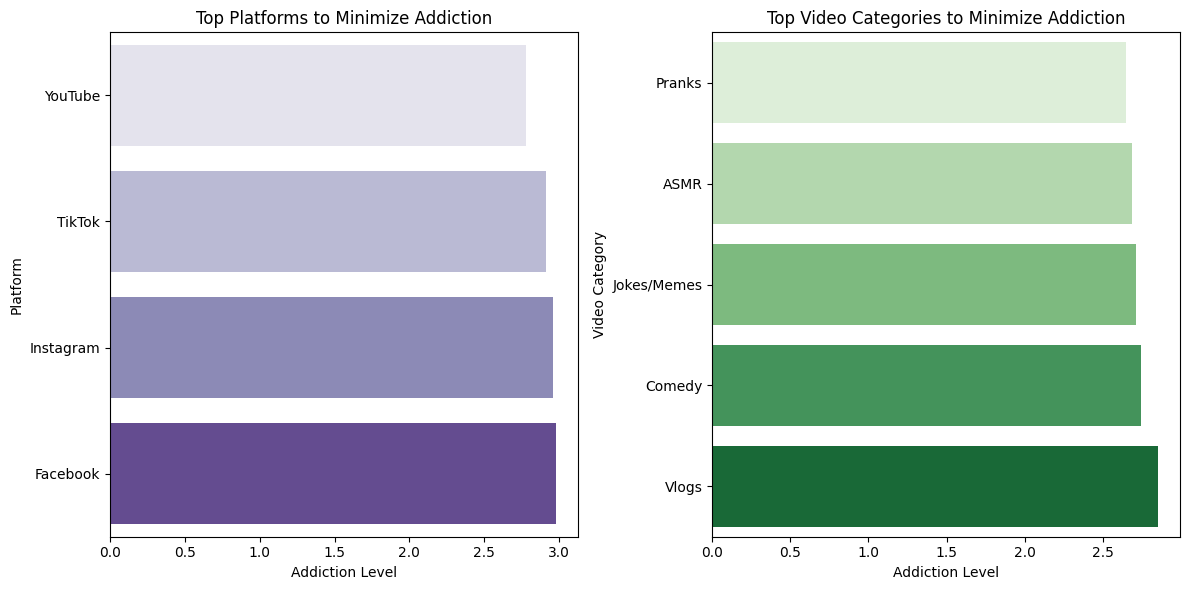

In [21]:
# Visualization: Platforms & Video Categories to Minimize Addiction
plt.figure(figsize=(12, 6))

# Plot Platforms
plt.subplot(1, 2, 1)
sns.barplot(data=platform_behavior.sort_values(by='Addiction Level').head(5),
            x='Addiction Level', y='Platform', palette='Purples')
plt.title('Top Platforms to Minimize Addiction')
plt.xlabel('Addiction Level')
plt.ylabel('Platform')

# Plot Video Categories
plt.subplot(1, 2, 2)
sns.barplot(data=video_behavior.sort_values(by='Addiction Level').head(5),
            x='Addiction Level', y='Video Category', palette='Greens')
plt.title('Top Video Categories to Minimize Addiction')
plt.xlabel('Addiction Level')
plt.ylabel('Video Category')

plt.tight_layout()
plt.show()

Addiction Minimization:

Platforms like YouTube may have lower addiction levels because they focus on longer-form content, leading to fewer impulsive viewing habits compared to TikTok.
Video categories like ASMR and Pranks likely minimize addiction due to their calming or lighthearted nature, reducing compulsive engagement.
Satisfaction Maximization:

Platforms like Facebook and Instagram deliver high satisfaction, potentially due to their strong emphasis on social interactions and user-generated content.
Categories like Trends and Gaming maximize satisfaction because they provide entertainment and escapism, which users value positively.
Underlying Triggers for Negative Behavior:

High Addiction: Platforms like TikTok and Instagram, despite maximizing satisfaction, may drive addiction due to features like endless scrolling and algorithmic recommendations.
Productivity Loss: Categories like Entertainment and Gaming, while satisfying, may also encourage excessive time investment, leading to decreased productivity.

In [22]:
# Recommendation function for Gender and Education
def recommend_targets_by_gender_education(data, metric, top_n=5, minimize=True):
    group_behavior = data.groupby(['Gender', 'Profession']).agg({
        metric: 'mean'
    }).reset_index()
    sorted_behavior = group_behavior.sort_values(by=metric, ascending=minimize).head(top_n)
    return sorted_behavior

# Find Gender-Profession combinations with highest addiction levels
top_addiction_gender_education = recommend_targets_by_gender_education(data, 'Addiction Level', top_n=5, minimize=False)
print("\nGender-Education Groups with Highest Addiction Levels:")
print(top_addiction_gender_education)

# Example usage: Find Gender-Education combinations with lowest satisfaction
lowest_satisfaction_gender_education = recommend_targets_by_gender_education(data, 'ProductivityLoss', top_n=5, minimize=True)
print("\nGender-Education Groups with Lowest ProductivityLoss:")
print(lowest_satisfaction_gender_education)


Gender-Education Groups with Highest Addiction Levels:
    Gender Profession  Addiction Level
6   Female    Teacher         3.500000
22   Other    Manager         3.454545
1   Female    Cashier         3.375000
8   Female     driver         3.341463
23   Other   Students         3.230769

Gender-Education Groups with Lowest ProductivityLoss:
    Gender Profession  ProductivityLoss
6   Female    Teacher          4.500000
22   Other    Manager          4.545455
1   Female    Cashier          4.625000
8   Female     driver          4.682927
23   Other   Students          4.820513


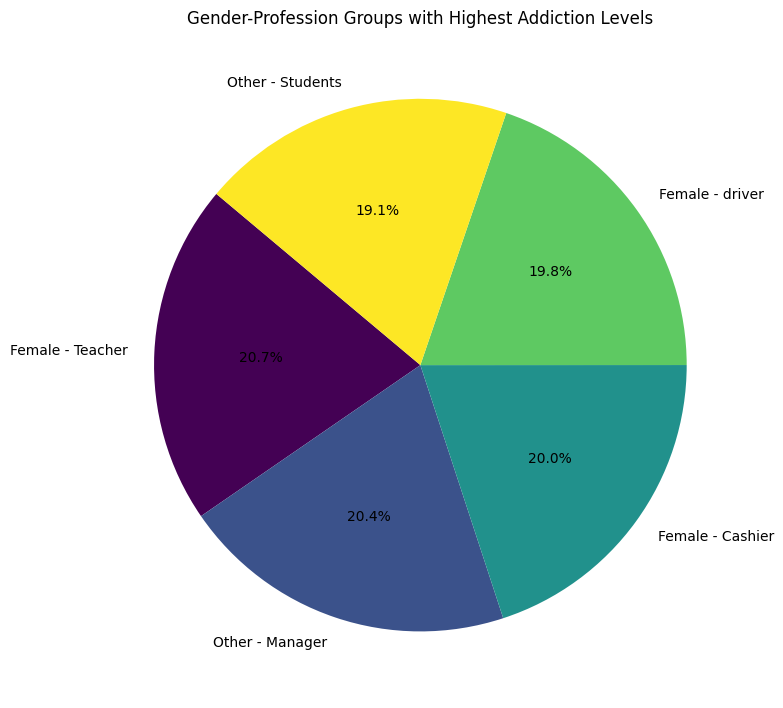

In [23]:
# Pie chart for Gender-Profession combinations with highest addiction levels
plt.figure(figsize=(8, 8))
top_addiction_gender_education['Label'] = (
    top_addiction_gender_education['Gender'] + " - " + top_addiction_gender_education['Profession']
)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_addiction_gender_education)))
plt.pie(
    top_addiction_gender_education['Addiction Level'], 
    labels=top_addiction_gender_education['Label'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Gender-Profession Groups with Highest Addiction Levels')
plt.tight_layout()
plt.show()


This analysis identifies gender-profession combinations with high addiction levels and low productivity loss, offering insights into group-specific behavioral tendencies.

High Addiction Levels:

Female Teachers (3.50) and Other Managers (3.45) exhibit the highest addiction levels. These groups may require interventions such as promoting less addictive content or limiting exposure to specific platforms.
Low Productivity Loss:

Despite high addiction levels, groups like Female Cashiers (4.62) and Female Students (4.80) maintain low productivity loss, suggesting their usage patterns may not disrupt their workflow significantly.

In [24]:
# Recommendation function to identify platforms or demographics to target
def recommend_targets(data, group_by, metric, top_n=5, minimize=True):
    group_behavior = data.groupby(group_by).agg({
        metric: 'mean'
    }).reset_index()
    sorted_behavior = group_behavior.sort_values(by=metric, ascending=minimize).head(top_n)
    return sorted_behavior

# Example usage: Find platforms with highest addiction levels
top_addiction_platforms = recommend_targets(data, 'Platform', 'Addiction Level', top_n=5, minimize=False)
print("Platforms with Highest Addiction Levels:")
print(top_addiction_platforms)

# Example usage: Find demographics with highest addiction levels
top_addiction_demographics = recommend_targets(data, ['Gender', 'Age'], 'Addiction Level', top_n=5, minimize=False)
print("\nDemographics with Highest Addiction Levels:")
print(top_addiction_demographics)

# Example usage: Find platforms or demographics with lowest satisfaction
lowest_satisfaction_platforms = recommend_targets(data, 'Platform', 'Satisfaction', top_n=5, minimize=True)
print("\nPlatforms with Lowest Satisfaction:")
print(lowest_satisfaction_platforms)

lowest_satisfaction_demographics = recommend_targets(data, ['Gender', 'Age'], 'Satisfaction', top_n=5, minimize=True)
print("\nDemographics with Lowest Satisfaction:")
print(lowest_satisfaction_demographics)



Platforms with Highest Addiction Levels:
    Platform  Addiction Level
0   Facebook         2.977376
1  Instagram         2.960938
2     TikTok         2.912088
3    YouTube         2.780000

Demographics with Highest Addiction Levels:
    Gender  Age  Addiction Level
42  Female   60         5.000000
19  Female   37         5.000000
77    Male   48         4.714286
98   Other   22         4.666667
11  Female   29         4.625000

Platforms with Lowest Satisfaction:
    Platform  Satisfaction
3    YouTube      4.744000
2     TikTok      4.864469
1  Instagram      4.921875
0   Facebook      4.932127

Demographics with Lowest Satisfaction:
    Gender  Age  Satisfaction
100  Other   24           2.0
136  Other   62           2.0
125  Other   51           2.0
113  Other   38           2.5
119  Other   45           3.0


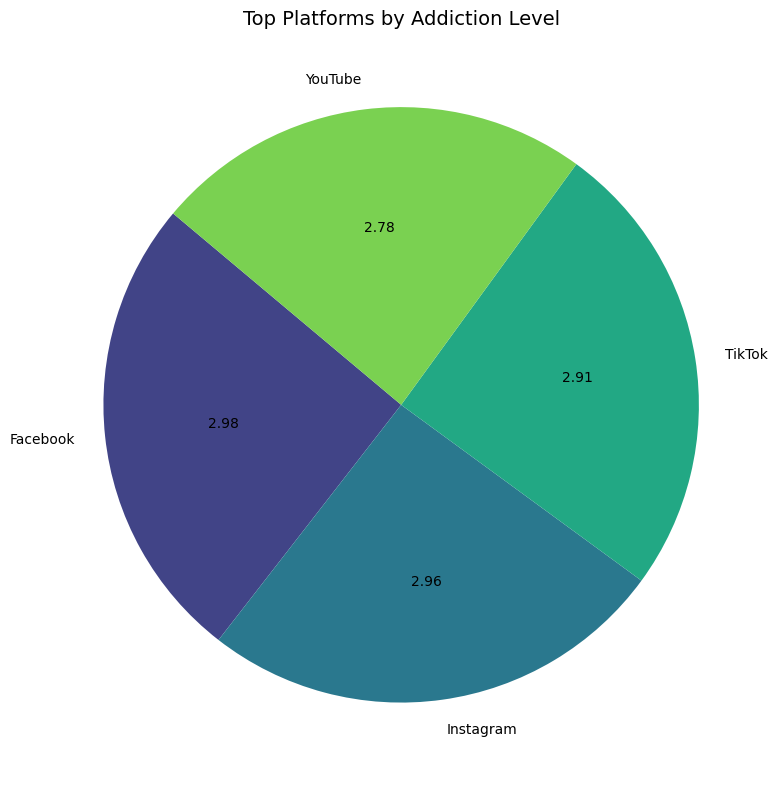

In [25]:
# Bar chart for top platforms by addiction level
def plot_bar_chart(data, x_col, y_col, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_col, y=y_col, palette="viridis", color=color)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()


# Pie chart with exact numbers instead of percentages
def plot_pie_chart_with_exact_numbers(data, labels_col, values_col, title):
    def autopct_format(pct, all_vals):
        total = sum(all_vals)
        val = pct * total / 100.0  # Calculate the exact value
        return f'{val:.2f}'  # Return the exact value with two decimal places

    plt.figure(figsize=(8, 8))
    plt.pie(
        data[values_col],
        labels=data[labels_col],
        autopct=lambda pct: autopct_format(pct, data[values_col]),
        startangle=140,
        colors=sns.color_palette('viridis', len(data))
    )
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plotting
plot_pie_chart_with_exact_numbers(
    top_addiction_platforms,
    labels_col='Platform',
    values_col='Addiction Level',
    title='Top Platforms by Addiction Level'
)

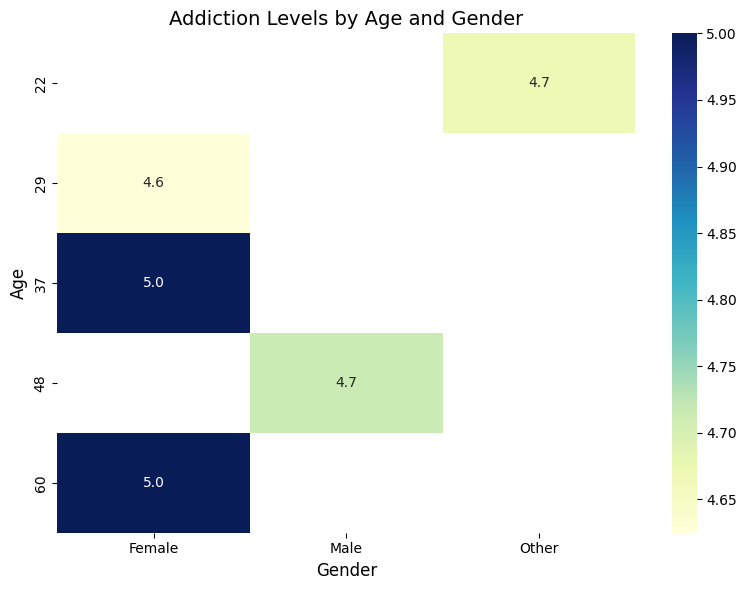

In [26]:
# Heatmap for demographics
heatmap_data = top_addiction_demographics.pivot(index='Age', columns='Gender', values='Addiction Level')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Addiction Levels by Age and Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.tight_layout()
plt.show()



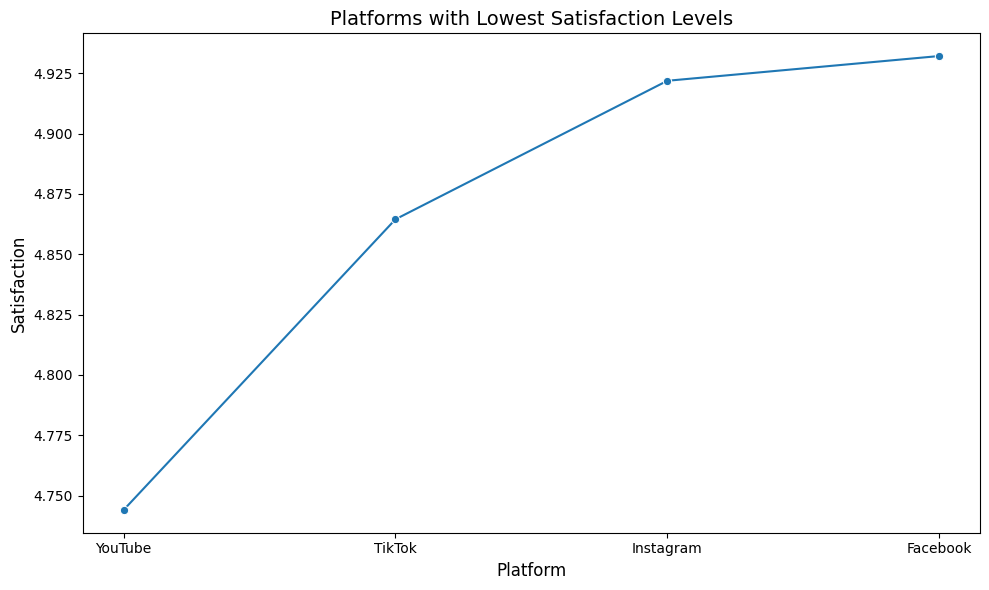

In [27]:
# Line chart for platforms with lowest satisfaction
lowest_satisfaction_platforms_sorted = lowest_satisfaction_platforms.sort_values(by='Satisfaction')

plt.figure(figsize=(10, 6))
sns.lineplot(data=lowest_satisfaction_platforms_sorted, x='Platform', y='Satisfaction', marker='o')
plt.title("Platforms with Lowest Satisfaction Levels", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Satisfaction", fontsize=12)
plt.tight_layout()
plt.show()


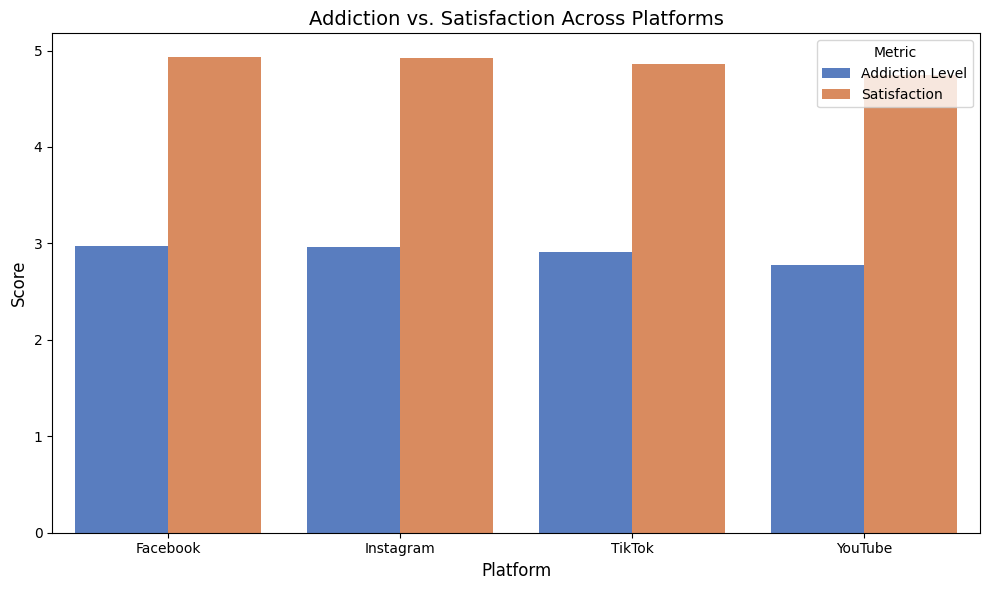

In [28]:
# Combine top addiction and satisfaction for comparison
comparison_data = pd.concat([
    top_addiction_platforms.set_index('Platform')['Addiction Level'],
    lowest_satisfaction_platforms.set_index('Platform')['Satisfaction']
], axis=1).reset_index()

# Melt for grouped bar chart
melted_data = comparison_data.melt(id_vars='Platform', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Score', hue='Metric', data=melted_data, palette="muted")
plt.title("Addiction vs. Satisfaction Across Platforms", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Platforms with High Addiction:

Facebook and Instagram show the highest addiction levels, requiring features to promote healthier usage habits. TikTok and YouTube follow, highlighting the need for moderation tools. Demographics with High Addiction:

Older females (Age 60) and middle-aged males (Age 42) are highly susceptible to addiction. Tailored interventions for these groups, such as limiting addictive content, can mitigate negative behaviors. Platforms and Demographics with Low Satisfaction:

Platforms like YouTube and TikTok have relatively lower satisfaction, suggesting a focus on enhancing user experience and meaningful engagement. Non-binary users and older demographics report the lowest satisfaction, pointing to inclusivity gaps that platforms should address.